***
# Key Findings
Capstone Project - Ali Sehpar Shikoh
***

<b> Previous Notebook: DataModelling

This is the final notebook.

This notebook summarizes key findings/insights alongside providing future steps that can take this project further.

<u> Note: The diagrams mentioned here are only for illustration purposes. Please refer to original notebooks to run the code.

### Major findings from EDA.

An overall increase in features (i.e. temperature change, crop yield, roundwood production)of the dataset is observed. On average, a mean temperature change of 1.5 degree celsius is observed globally with european countries being effected the most.

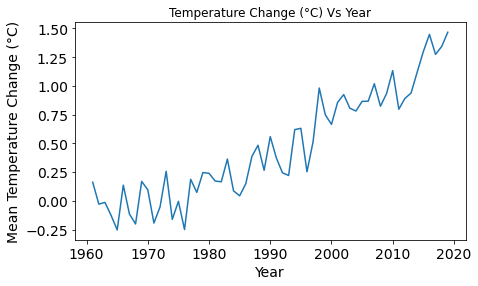

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(Main_df9.groupby('Year').mean()[['Temperature Change (°C)']])
plt.title('Temperature Change (°C) Vs Year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Temperature Change (°C)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<Figure size 432x288 with 0 Axes>

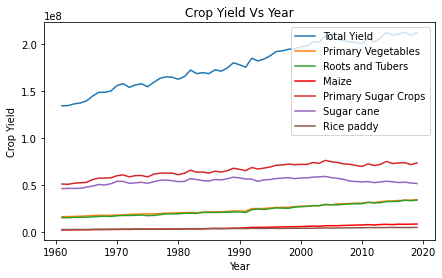

In [ ]:
fig = plt.figure()
plt.figure(figsize=(7,4)) 
plt.plot(Main_df9.groupby('Year').sum()[['Total Yield (hg/ha)']], label = 'Total Yield')
plt.plot(Main_df9.groupby('Year').sum()[['Primary Vegetables Yield (hg/ha)']], label = 'Primary Vegetables')
plt.plot(Main_df9.groupby('Year').sum()[['Total Roots and Tubers Yield (hg/ha)']], label = 'Roots and Tubers')
plt.plot(Main_df9.groupby('Year').sum()[['Maize Yield (hg/ha)']], color='red', label = 'Maize')
plt.plot(Main_df9.groupby('Year').sum()[['Primary Sugar Crops Yield (hg/ha)']], label = 'Primary Sugar Crops')
plt.plot(Main_df9.groupby('Year').sum()[['Sugar cane Yield (hg/ha)']], label = 'Sugar cane')
plt.plot(Main_df9.groupby('Year').sum()[['Rice paddy Yield (hg/ha)']], label = 'Rice paddy')

plt.legend()
plt.title('Crop Yield Vs Year')
plt.xlabel('Year')
plt.ylabel('Crop Yield')
plt.show()

Majority of the countries having the highest yield belong to Africa. This might be due to various factors i.e. appropriate climate, smart agricultural methodologies.

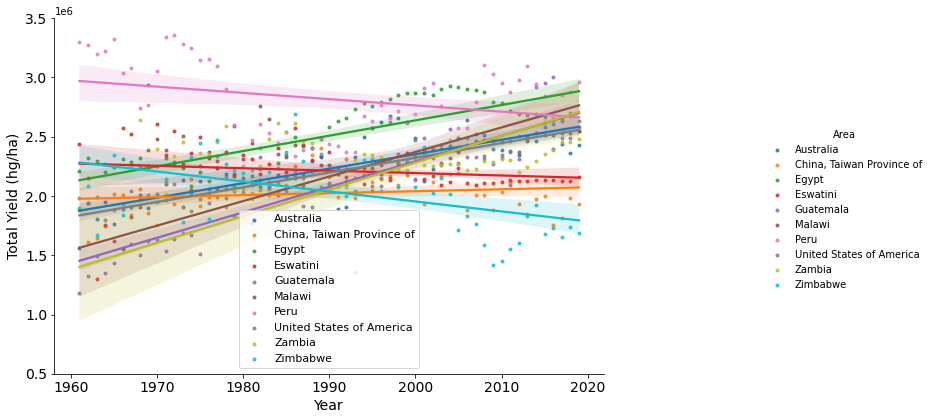

In [ ]:
graph = sns.lmplot(x='Year', y='Total Yield (hg/ha)', data=Area_highest_yield2, hue='Area', markers='.')
graph.fig.set_size_inches(14, 6)
plt.xlabel('Year', fontsize=14) 
plt.ylabel('Total Yield (hg/ha)', fontsize=14) 
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.legend(fontsize=11)
plt.show()

Colinearity is observed between various independent features included in the dataset.

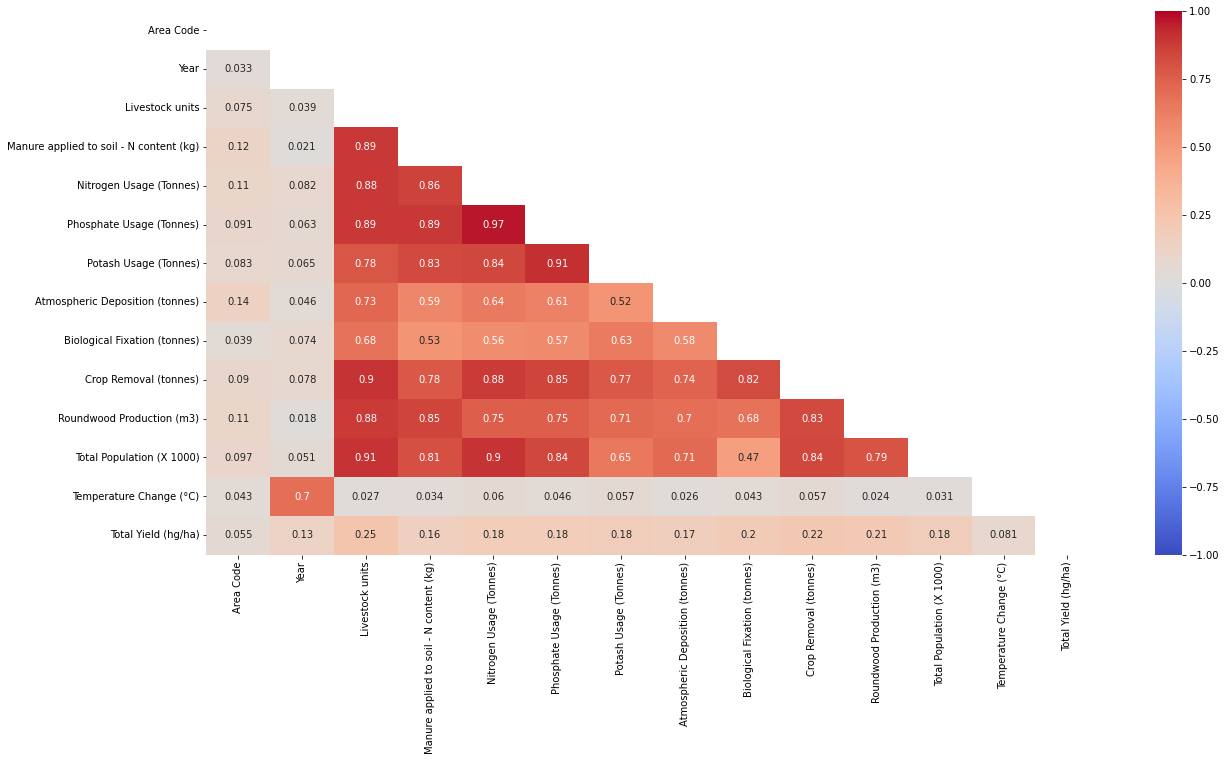

In [ ]:
# find the correlation between the variables
corr = Main_df10.corr()
 
# plot the correlation matrix using a heatmap
plt.figure(figsize=(20,10))
matrix = np.triu(Main_df10.corr())
sns.heatmap(corr, annot=True, mask=matrix, cmap='coolwarm', vmax=1, vmin=-1)
plt.show()

### Major findings from Modelling.

<u> Best Model (Execution and Evaluation)

Best hyper-parameters:

|Max Depth|Learning Rate|No of estimators|
|---|---|---|
|13|0.1|196|

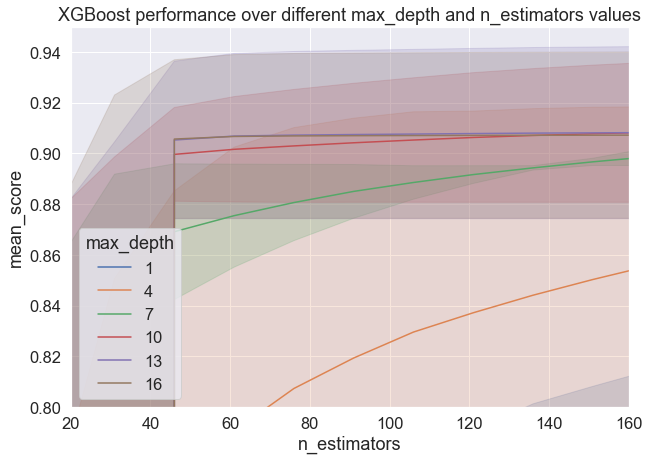

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='n_estimators', y='mean_score', hue='max_depth', data=XGB_results_df)
plt.ylim(0.8, 0.95)
plt.xlim(20, 160)
plt.title('XGBoost performance over different max_depth and n_estimators values')
plt.show()

<u> Key evaluation statistics for best model (after hyperparameter optimization):

|R2 Score (Train Set)|R2 Score (Test Set)|Mean Squared Error|Mean Absolute Persentage Error|Median Absolute Error|
|---|---|---|---|---|
|0.9985|0.9574|18.69e9|0.1195|4.82e4|

<b> Interpretation of Lasso Regression Model

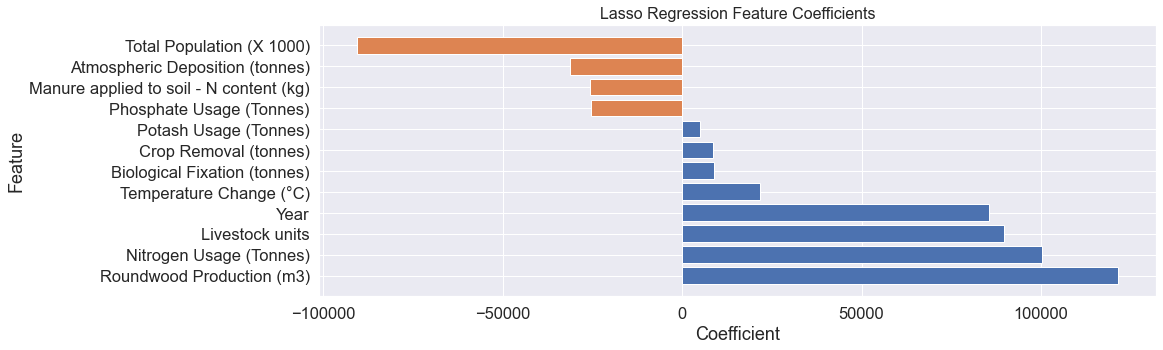

In [ ]:
plt.figure(figsize=(15,5))
sns.set(font_scale = 1.5)
positive_coefs = coef_df.loc[(coef_df['Coefficients'] >=0) & ((coef_df['Variable'] == 'Year') | (coef_df['Variable'] == 'Livestock units') | (coef_df['Variable'] == 'Manure applied to soil - N content (kg)') | (coef_df['Variable'] == 'Nitrogen Usage (Tonnes)') | (coef_df['Variable'] == 'Phosphate Usage (Tonnes)') | (coef_df['Variable'] == 'Potash Usage (Tonnes)') | (coef_df['Variable'] == 'Atmospheric Deposition (tonnes)') | (coef_df['Variable'] == 'Biological Fixation (tonnes)') | (coef_df['Variable'] == 'Crop Removal (tonnes)') | (coef_df['Variable'] == 'Roundwood Production (m3)') | (coef_df['Variable'] == 'Total Population (X 1000)') | (coef_df['Variable'] == 'Temperature Change (°C)'))]
plt.barh(positive_coefs['Variable'], positive_coefs['Coefficients'])
negative_coefs = coef_df.loc[(coef_df['Coefficients'] < 0) & ((coef_df['Variable'] == 'Year') | (coef_df['Variable'] == 'Livestock units') | (coef_df['Variable'] == 'Manure applied to soil - N content (kg)') | (coef_df['Variable'] == 'Nitrogen Usage (Tonnes)') | (coef_df['Variable'] == 'Phosphate Usage (Tonnes)') | (coef_df['Variable'] == 'Potash Usage (Tonnes)') | (coef_df['Variable'] == 'Atmospheric Deposition (tonnes)') | (coef_df['Variable'] == 'Biological Fixation (tonnes)') | (coef_df['Variable'] == 'Crop Removal (tonnes)') | (coef_df['Variable'] == 'Roundwood Production (m3)') | (coef_df['Variable'] == 'Total Population (X 1000)') | (coef_df['Variable'] == 'Temperature Change (°C)'))]
plt.barh(negative_coefs['Variable'], negative_coefs['Coefficients'])
plt.title('Lasso Regression Feature Coefficients', fontsize=16)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

Top 3 Positive Features:
- Roundwoood Production
- Nitrogen based fertilizer usages
- Livestock units
    
Top 3 Negative Features:
- Total Population
- Atmospheric Deposition
- Manure applied to soil

<b> Interpretation of XGBoost Regression Model using 'SHAP' package

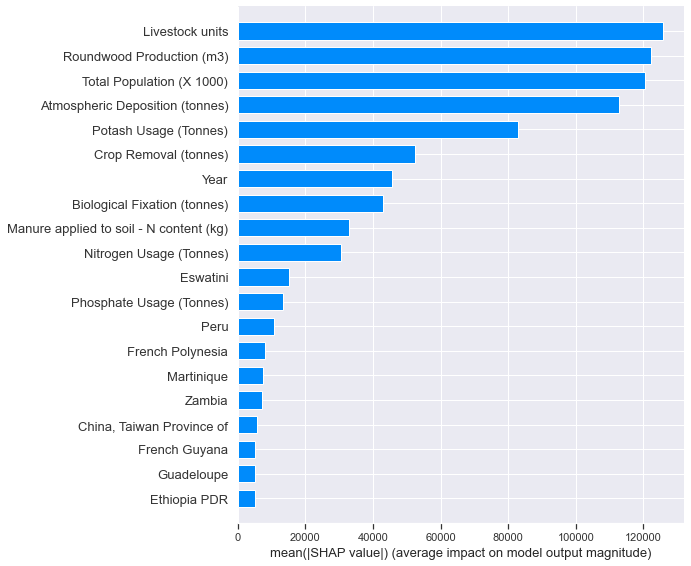

In [ ]:
shap.initjs()

shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')

Top 3 Key features:

- Livestock units
- Roundwood production
- Total population

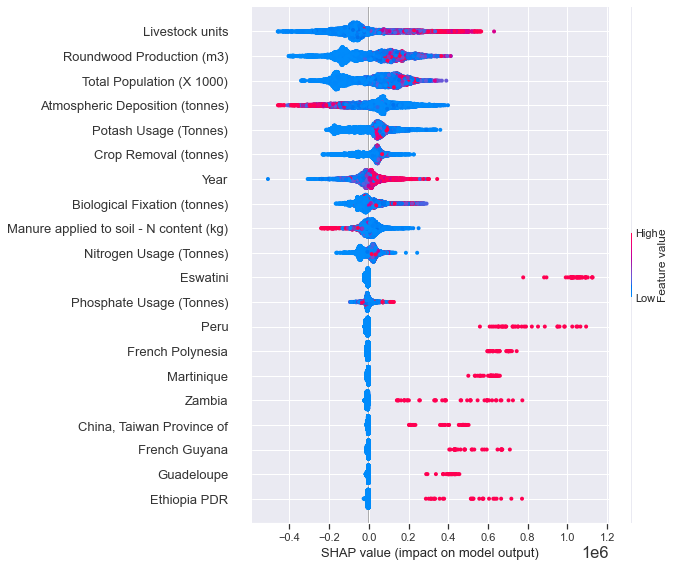

In [ ]:
shap.initjs()

shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

Key Insights:
- Increased livestock units tend to have positive effect on crop yield.
- Higher atmospheric deposition has a negative effect on crop yield.
- Manure applied in lesser quantities is good for crop yield.
- The crop yield is increasing with every passing year.
- A sweet spot exist in case of roundwood production and total population shaded as red. This tells that these features have a complex relationship with crop yield. Deviating away from the sweet sport tends to decrease the crop yield.
- Countries like Eswatini, Peru, Martinique turn out to have a positive impact of crop yield i.e. they tend to have one of the highest crop yields.

### Next Steps

- Probe into country or regions having seen a decline in crop yield on yearly basis. 
- Incorporate additional features such as precipitation, CO2 emission, pesticides/insecticides use, etc. into the dataset.
